In [45]:
#Подключение библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
#Установка стиля графиков
plt.style.use('bmh')

In [3]:
#Загрузка данных
zn_df = pd.read_csv('real_estate_data.csv')

C:\Users\valya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#Вывод первых 5 строк
zn_df.head()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


In [5]:
#Размерность набора данных
zn_df.shape

(403487, 17)

In [6]:
#Основная информаци о наборе данных
zn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

In [7]:
#Описательная статистика
zn_df.describe()

,id,listing_type,tom,size,furnished,price
count,403487.00000,403487.000000,403487.000000,257481.000000,0.0,4.027720e+05
mean,201744.00000,1.294235,57.022739,279.349094,NaN,3.546417e+05
std,116476.80837,0.467733,44.358933,9429.195331,NaN,4.809503e+06
min,1.00000,1.000000,0.000000,1.000000,NaN,-2.500000e+02
25%,100872.50000,1.000000,29.000000,85.000000,NaN,2.500000e+03
50%,201744.00000,1.000000,40.000000,110.000000,NaN,1.990000e+05
75%,302615.50000,2.000000,90.000000,140.000000,NaN,3.420000e+05
max,403487.00000,3.000000,180.000000,948235.000000,NaN,2.000000e+09


In [8]:
#Проврека на несуществующие значения
zn_df.isnull().sum()

id                        0
type                      0
sub_type                  0
start_date                0
end_date             137189
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
floor_no              35296
room_count                0
size                 146006
address                   0
furnished            403487
heating_type          27970
price                   715
price_currency          715
dtype: int64

In [9]:
#Замена несуществующих значений
zn_df['end_date'].fillna(0, inplace=True)
zn_df['building_age'].fillna(zn_df['building_age'].mode()[0], inplace=True)
zn_df['total_floor_count'].fillna(zn_df['total_floor_count'].mode()[0], inplace=True)
zn_df['floor_no'].fillna(zn_df['floor_no'].mode()[0], inplace=True)
zn_df['size'].fillna(zn_df['size'].mean(), inplace=True)
zn_df = zn_df.drop(['furnished'], axis = 1)
zn_df['heating_type'].fillna(zn_df['heating_type'].mode()[0], inplace=True)
zn_df['price'].fillna(zn_df['price'].mean(), inplace=True)
zn_df['price_currency'].fillna(zn_df['price_currency'].mode()[0], inplace=True)

In [10]:
#Количество каждого типа недвижимости
zn_df['sub_type'].value_counts()

Daire                  354549
Villa                   21324
Müstakil Ev              9563
Rezidans                 7716
Yazlık                   5929
Komple Bina              2607
Prefabrik Ev              679
Çiftlik Evi               528
Köşk / Konak / Yalı       301
Yalı Dairesi              187
Kooperatif                 70
Loft                       34
Name: sub_type, dtype: int64

C:\Users\valya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


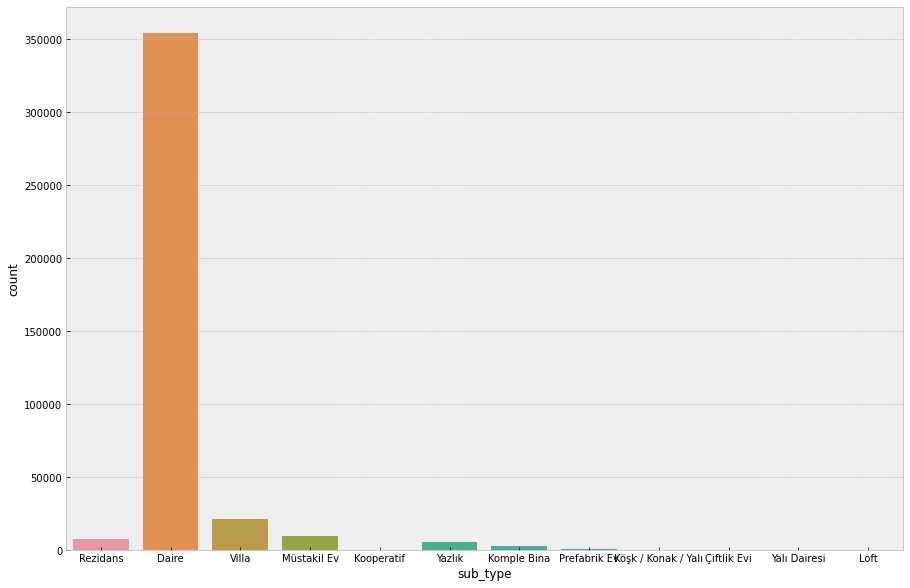

In [11]:
#Распределение на графике
plt.rcParams['figure.figsize']=(15,10)
sns.countplot(zn_df['sub_type'])

In [12]:
#Наиболее часто встречающиеся адреса
zn_df['address'].value_counts().head(5)

Balıkesir/Edremit/Akçay              5611
Aydın/Didim/Efeler                   4203
İstanbul/Beylikdüzü/Cumhuriyet       3283
İstanbul/Bahçelievler/Siyavuşpaşa    2139
Aydın/Didim/Altınkum                 2085
Name: address, dtype: int64

In [13]:
#Медиана и стандартное отклонение цены (Price)
print('Mediana Price: {:.2f}'.format(zn_df['price'].median()))
print ('STD Price: {:.2f}'.format(zn_df['price'].std()))

Mediana Price: 200000.00
STD Price: 4805239.46


In [14]:
#Преобразование данных
zn_df = zn_df.drop(['type'], axis=1)

In [15]:
#Замена символьных значений на числовые
subtype = {"Daire": 1, "Villa": 2, "Müstakil Ev": 3, "Rezidans": 4, 
            "Yazlık": 5, "Komple Bina": 6, "Prefabrik Ev": 7, "Çiftlik Evi": 8,
           "Köşk / Konak / Yalı": 9, "Yalı Dairesi": 10, "Kooperatif": 11, "Loft": 12}
data = [zn_df]
for dataset in data:
    dataset['sub_type'] = dataset['sub_type'].map(subtype)

In [16]:
#Замена на числовые значения
bage = {"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6-10 arası": 6, "11-15 arası": 7,
       "16-20 arası": 8, "21-25 arası": 9, "26-30 arası": 10, "31-35 arası": 11, 
       "36-40 arası": 12, "40 ve üzeri": 13}
data = [zn_df]
for dataset in data:
    dataset['building_age'] = dataset['building_age'].map(bage)

In [17]:
#Замена на числовые значения
tfc = {"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7,
       "8": 8, "9": 9, "10": 10, "10-20 arası": 11, "20 ve üzeri": 12}
data = [zn_df]
for dataset in data:
    dataset['total_floor_count'] = dataset['total_floor_count'].map(tfc)

In [18]:
#Замена на числовые значения
fn = {"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7,
      "8": 8, "9": 9, "10": 10, "11": 11, "12": 12, "13": 13, "14": 14, "15": 15,
     "16": 16, "17": 17, "18":18, "19": 19, "20 ve üzeri": 20, "Yüksek Giriş": 21,
     "Müstakil":22, "Bahçe katı": 23, "Giriş Katı":24, "Kot 1": 25, "Kot 2": 26,
     "Kot 3": 27, "Kot 4": 28, "Çatı Katı": 29, "Zemin Kat": 30, "Komple": 31, 
      "En Üst Kat": 32, "Bodrum Kat": 33, "Teras Kat": 34, "Asma Kat": 35}
data = [zn_df]
for dataset in data:
    dataset['floor_no'] = dataset['floor_no'].map(fn)

In [19]:
#Замена на числовые значения
rc = {"3+1": 1, "2+1": 2, "1+1": 3, "4+1":4, "5+1": 5, "4+2": 6, "5+2": 7,
      "+": 8,"3+2": 9, "1+0":10, "6+1":11, "6+2":12, "2+2":13,"7+1":14,"7+2":15,"10+0":16,
      "8+1":17,"8+2":17,"6+3":18,"5+3":19,"4+3":20,"7+3":21,"9+1":22,"9+3":23,"9+2":24,
      "8+3":25,"8+4":26,"10+1":27,"10+2":27,"9+5":28,"9+4":29,"10+3":30,"10+5":31,"10+4":32,
      "15+5":33,"0+0":34,"11+3":35}
data=[zn_df]
for dataset in data:
    dataset['room_count'] = dataset['room_count'].map(rc)

In [20]:
#Замена на числовые значения
ht = {"Kombi (Doğalgaz)": 1, "Klima": 2, "Merkezi Sistem (Isı Payı Ölçer)": 3, 
      "Merkezi Sistem": 4, "Kalorifer (Doğalgaz)": 5, "Soba (Kömür)": 6, "Yerden Isıtma":7,
      "Yok":8, "Kat Kaloriferi": 9, "Kombi (Elektrikli)": 10, "Soba (Doğalgaz)": 11,
      "Güneş Enerjisi":12, "Kalorifer (Kömür)": 13, "Jeotermal":14, "Fancoil":15,"Kalorifer (Akaryakıt)":16}
data = [zn_df]
for dataset in data:
    dataset['heating_type'] = dataset['heating_type'].map(ht)

In [21]:
#КЛАССИФИКАЦИЯ

In [22]:
#Корреляция признаков (взаимосвязь между столбцами)
corrmat = zn_df.corr()
corrmat

,id,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price
id,1.000000,-0.042025,0.033796,-0.003890,-0.119772,0.132537,-0.274854,-0.017949,0.006765,0.098216,-0.001935
sub_type,-0.042025,1.000000,-0.071246,0.045088,0.033265,-0.111931,0.046006,0.226314,0.010809,0.112923,0.062300
listing_type,0.033796,-0.071246,1.000000,-0.126534,0.181536,0.083077,-0.034756,-0.016406,-0.008258,-0.023656,-0.044237
tom,-0.003890,0.045088,-0.126534,1.000000,-0.026863,-0.019404,0.012401,0.031695,-0.007621,0.003406,0.011797
building_age,-0.119772,0.033265,0.181536,-0.026863,1.000000,-0.055363,0.088459,-0.015916,0.006945,0.065846,0.005647
total_floor_count,0.132537,-0.111931,0.083077,-0.019404,-0.055363,1.000000,-0.113274,-0.051810,-0.002014,-0.006527,-0.004687
floor_no,-0.274854,0.046006,-0.034756,0.012401,0.088459,-0.113274,1.000000,0.067462,0.008796,-0.042900,0.002326
room_count,-0.017949,0.226314,-0.016406,0.031695,-0.015916,-0.051810,0.067462,1.000000,0.072750,0.038534,0.071631
size,0.006765,0.010809,-0.008258,-0.007621,0.006945,-0.002014,0.008796,0.072750,1.000000,0.027476,0.004158
heating_type,0.098216,0.112923,-0.023656,0.003406,0.065846,-0.006527,-0.042900,0.038534,0.027476,1.000000,0.013387


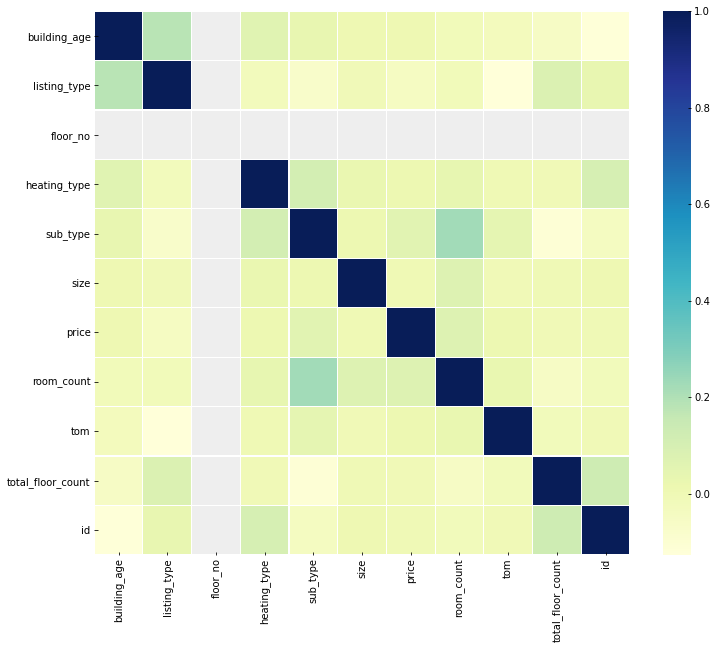

In [23]:
#Тепловая карта
#Наглядное отображение зависимостей
k = 15
cols = corrmat.nlargest(k, 'building_age')['building_age'].index
cm = np.corrcoef(zn_df[cols].values.T)
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values,
           xticklabels = cols.values)

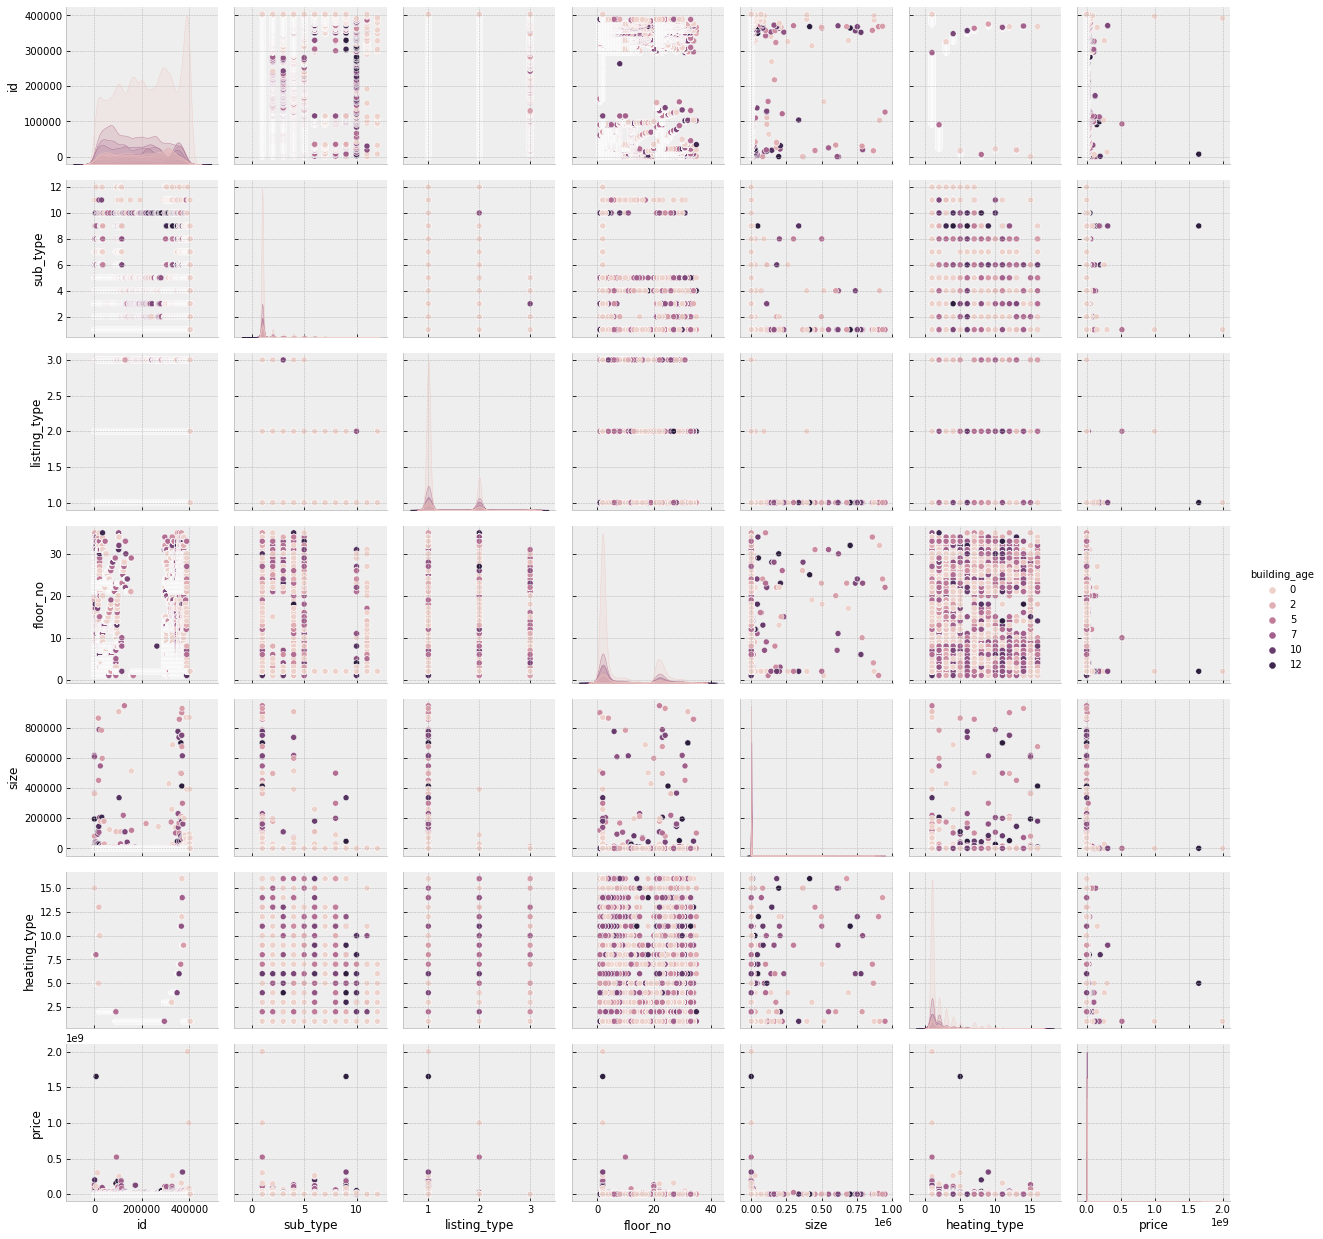

In [44]:
#Попарные зависимости признаков
sns.pairplot(zn_df, hue='building_age')

In [24]:
#Удаление признаков с наименьшей связью
zn_df = zn_df.drop(['start_date', 'end_date
                    ','total_floor_count', 'tom', 'room_count', 'address', 'price_currency'], axis=1)

In [25]:
#Избавление от нулевых значений
zn_df['floor_no'].fillna(zn_df['floor_no'].mode()[0], inplace=True)

In [26]:
#Преобразование в целочисленный тип оставшихся признаки
zn_df['floor_no'] = zn_df['floor_no'].astype(int)
zn_df['size'] = zn_df['size'].astype(int)
zn_df['price'] = zn_df['price'].astype(int)

In [27]:
#Разделение набора данных на обучающую и тестовую выборки
X_train = zn_df.drop("building_age", axis=1)
Y_train = zn_df["building_age"]
X_test  = zn_df.drop("id", axis=1).copy()

In [35]:
#Обучение и прогнозирование
#Метод k-ближайших соседей
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
rez_mod = round(model.score(X_train, Y_train)*100, 2)
print(rez_mod,"%")

56.49 %


In [63]:
#Логистическая регрессия
model = LogisticRegression(C=3)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
rez_mod = round(model.score(X_train, Y_train) * 100, 2)
print(rez_mod,"%")

C:\Users\valya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


41.51 %


In [41]:
#Случайный лес
model = RandomForestClassifier(criterion='entropy',n_estimators=50,min_samples_split=10,
                               min_samples_leaf=1,max_features='auto', n_jobs=-1)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
rez_mod = round(model.score(X_train, Y_train) * 100, 2)
print(rez_mod,"%")

72.67 %


In [40]:
#Метод опорных векторов
model = LinearSVC()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
rez_mod = round(model.score(X_train, Y_train) * 100, 2)
print(rez_mod,"%")

C:\Users\valya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


10.58 %
